# Madrid house price prediction

En este proyecto de ciencia de datos, hemos llevado a cabo un análisis detallado de un conjunto de datos de ventas de viviendas en el condado de King, con el propósito de desarrollar un modelo predictivo preciso para estimar los precios de las propiedades. A través de un exhaustivo Análisis Exploratorio de Datos (EDA), hemos obtenido una comprensión profunda de las características y relaciones clave entre las variables. Ahora, nos encontramos en una fase crucial: la construcción, evaluación y selección del modelo más adecuado para el pronóstico.

## 1. Contexto


## 2. Datos
Los datos se refieren a las viviendas de la ciudad de Madrid a lo largo de sus 21 distritosun 

### 2.1 Carga de datos

In [42]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Importing ML libraries and metrics
from math import sqrt
from tqdm import tqdm
import lightgbm as lgb
import xgboost as xgb
from lightgbm import early_stopping, log_evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [43]:
# Ajusta las opciones de visualización
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [44]:
X_train= pd.read_csv('./data/X_train_scaledVC.csv',sep=";",index_col=False)
X_test= pd.read_csv('./data/X_test_scaledVC.csv',sep=";",index_col=False)


In [45]:
# Basic dataset information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 73 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   m2_constr                                         7896 non-null   float64
 1   cod_distrito                                      7896 non-null   float64
 2   cod_barrio                                        7896 non-null   float64
 3   estado                                            7896 non-null   float64
 4   amueblado                                         7896 non-null   float64
 5   planta                                            7896 non-null   float64
 6   codigo_postal                                     7896 non-null   float64
 7   certificado_energetico                            7896 non-null   float64
 8   orientacion_este                                  7896 non-null   float64
 9   orientacion_oeste  

In [46]:
# Identifying the unique number of values in the dfset
X_train.nunique()

m2_constr                                            526
cod_distrito                                          21
cod_barrio                                           131
estado                                                 6
amueblado                                              4
planta                                                27
codigo_postal                                         49
certificado_energetico                                 2
orientacion_este                                       2
orientacion_oeste                                      2
orientacion_sur                                        2
orientacion_norte                                      2
num_personas                                         131
num_personas_hombres                                 131
total_transacciones                                  122
viv_nuevas_transacciones                              58
lineas_metro                                           8
num_lineas_buses               

### 2.2 Análisis de datos

In [47]:
# Viewing the df statistics
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
m2_constr,7896.00,0.50,1.78,-1.06,-0.36,0.00,0.64,37.98
cod_distrito,7896.00,0.23,0.72,-0.62,-0.25,0.00,0.75,1.88
cod_barrio,7896.00,0.19,0.69,-0.66,-0.30,0.00,0.70,1.80
estado,7896.00,0.19,0.76,-0.50,-0.50,0.00,0.50,2.00
amueblado,7896.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
planta,7896.00,0.31,1.14,-1.50,-0.50,0.00,0.50,12.50
codigo_postal,7896.00,0.18,0.65,-0.69,-0.34,0.00,0.66,1.63
certificado_energetico,7896.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
orientacion_este,7896.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
orientacion_oeste,7896.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00


C:\Users\extas\AppData\Local\Temp\ipykernel_20772\3380500756.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(X_train['target'], kde=True, palette='Set1')


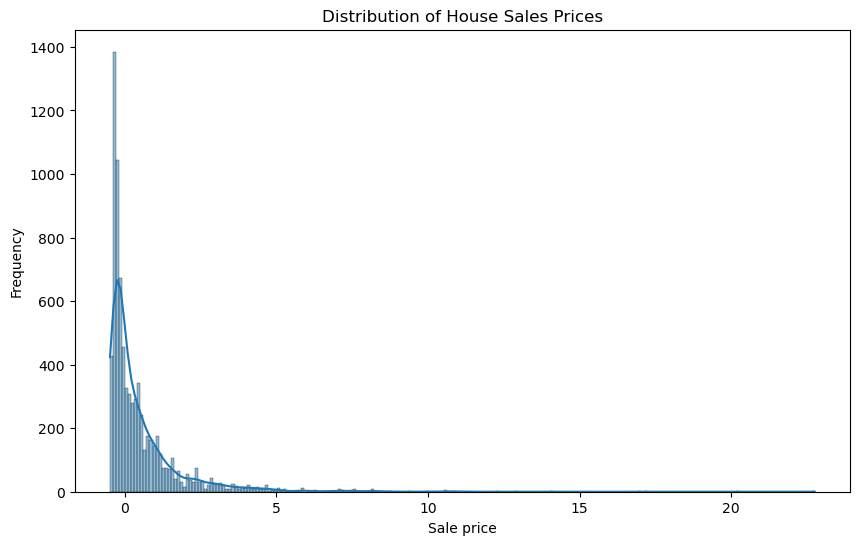

In [48]:
# View the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(X_train['target'], kde=True, palette='Set1')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [49]:
# Finding out the correlation between the features
#quitamos url
corr =  X_train.drop(columns=['url']).corr()

corr

,m2_constr,cod_distrito,cod_barrio,estado,amueblado,planta,codigo_postal,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,num_personas,num_personas_hombres,total_transacciones,viv_nuevas_transacciones,lineas_metro,num_lineas_buses,renta_bruta_media_por_persona,habitantes,tamano_medio_del_hogar,tamaño_del_hogar_(nº_de_personas_en_la_vivienda),hog_con_10,hog_con_15_y_más,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,tipologia_Atico,tipologia_Casa,tipologia_Chalet,tipologia_Duplex,tipologia_Estudio,tipologia_Piso,antiguedad_Desconocido,antiguedad_Entre 10 y 30 años,antiguedad_Entre 30 y 50 años,antiguedad_Entre 5 y 10 años,antiguedad_Menos de 5 años,antiguedad_Más de 50 años,tipo_inmueble_Desconocido,tipo_inmueble_económico,tipo_inmueble_lujo,tipo_inmueble_medio,tipo_inmueble_señorial,clasificacion_aire_Desconocido,clasificacion_aire_Eficiente,clasificacion_aire_Normal,clasificacion_aire_Sin Aire,tipo_suelo_Baldosa,tipo_suelo_Desconocido,tipo_suelo_Gres,tipo_suelo_Madera,tipo_suelo_Otros,tipo_suelo_Piedra,tipo_suelo_Radiante,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No amueblada,grupo_cocina_Reformada,grupo_cocina_Sin reforma,total_estaciones,habitaciones,atrib_lujo,atrib,serv_barrio,target
m2_constr,1.00,-0.08,-0.08,-0.04,0.01,-0.10,-0.07,-0.01,0.02,0.01,0.05,-0.00,-0.20,-0.04,-0.18,-0.07,0.13,-0.07,0.28,-0.09,-0.01,-0.08,-0.19,0.08,0.20,-0.08,-0.03,0.05,0.32,0.02,0.24,0.48,0.04,-0.07,-0.37,0.01,0.02,0.02,0.04,0.03,-0.04,-0.17,-0.07,0.25,-0.05,-0.01,-0.06,0.02,0.06,0.01,-0.03,0.05,-0.07,-0.01,-0.03,-0.01,0.02,-0.01,0.03,-0.04,-0.00,0.04,0.00,-0.01,-0.00,0.00,0.13,0.73,0.30,0.03,0.04,0.69
cod_distrito,-0.08,1.00,0.99,0.11,-0.16,-0.04,0.56,0.03,-0.00,0.01,-0.02,0.01,0.30,0.02,0.01,0.33,-0.69,-0.63,-0.56,0.29,0.81,-0.59,0.36,-0.19,0.14,0.04,0.05,-0.03,-0.60,-0.01,0.07,0.05,0.01,-0.03,-0.05,-0.06,0.10,0.11,-0.00,0.04,-0.05,0.11,0.12,-0.21,0.08,0.01,0.07,-0.00,-0.07,0.00,0.04,-0.08,0.09,0.03,0.04,-0.01,-0.00,-0.05,-0.01,0.01,-0.04,0.05,-0.01,0.01,0.01,0.01,0.28,-0.11,0.24,-0.01,-0.34,-0.28
cod_barrio,-0.08,0.99,1.00,0.11,-0.16,-0.04,0.56,0.03,-0.00,0.01,-0.01,0.01,0.30,0.02,0.01,0.34,-0.68,-0.62,-0.56,0.29,0.80,-0.57,0.37,-0.17,0.14,0.04,0.05,-0.03,-0.60,-0.01,0.08,0.05,0.01,-0.03,-0.05,-0.05,0.11,0.11,-0.00,0.04,-0.05,0.11,0.12,-0.21,0.08,0.01,0.07,-0.01,-0.07,-0.00,0.04,-0.08,0.09,0.03,0.03,-0.01,-0.00,-0.05,-0.01,0.01,-0.04,0.05,-0.01,0.01,0.01,0.01,0.28,-0.11,0.23,-0.01,-0.34,-0.28
estado,-0.04,0.11,0.11,1.00,0.08,0.03,0.03,-0.02,0.05,0.06,0.08,0.04,0.01,-0.00,-0.02,0.02,-0.08,-0.09,-0.03,-0.02,0.10,-0.12,-0.01,-0.06,0.05,0.06,0.13,0.23,-0.02,0.02,-0.02,-0.02,0.00,0.02,0.00,-0.01,-0.00,-0.00,0.02,0.08,-0.00,0.14,-0.09,-0.09,-0.05,-0.01,-0.20,0.04,0.20,-0.01,0.00,-0.16,0.04,0.16,-0.01,0.00,0.07,0.11,0.12,-0.10,0.11,-0.08,0.03,0.03,0.01,0.00,-0.00,-0.04,0.11,0.15,-0.04,-0.01
amueblado,0.01,-0.16,-0.16,0.08,1.00,0.01,-0.16,0.07,0.03,0.03,0.05,0.01,-0.09,-0.03,0.00,-0.06,0.11,0.12,0.10,-0.10,-0.18,0.10,-0.10,0.00,-0.05,-0.06,0.12,0.17,0.13,-0.02,-0.03,-0.02,-0.02,0.01,0.03,-0.19,0.04,0.04,0.00,0.02,0.17,-0.03,-0.04,0.06,-0.02,0.01,-0.22,0.01,0.22,-0.01,-0.02,-0.09,-0.02,0.11,-0.02,-0.01,0.03,0.10,0.16,-0.18,0.17,-0.01,0.05,-0.00,-0.01,-0.01,-0.11,0.02,-0.01,0.32,0.11,0.09
planta,-0.10,-0.04,-0.04,0.03,0.01,1.00,-0.09,0.00,-0.00,0.01,0.03,0.02,-0.02,-0.00,-0.01,-0.02,0.08,-0.01,0.10,-0.07,-0.05,-0.03,-0.11,-0.07,-0.04,0.00,-0.04,-0.01,0.08,0.44,-0.20,-0.20,-0.02,-0.03,-0.05,0.03,-0.04,0.03,0.00,-0.01,-0.02,0.05,-0.05,-0.02,-0.02,-0.01,-0.04,-0.02,0.04,-0.01,-0.01,0.00,-0.04,0.03,-0.02,0.00,-0.02,-0.03,-0.01,0.03,0.00,-0.03,0.01,-0.00,0.01,0.03,-0.08,-0.08,0.02,0.04,0.06,0.02
codigo_postal,-0.07,0.56,0.56,0.03,-0.16,-0.09,1.00,0.02,0.02,0.03,0.03,0.02,0.22,0.12,-0.02,0.32,-0.59,-0.26,-0.53,0.42,0.56,-0.24,0.40,-0.06,0.14,0.02,0.05,-0.06,-0.50,-0.03,0.10,0.

<Axes: >

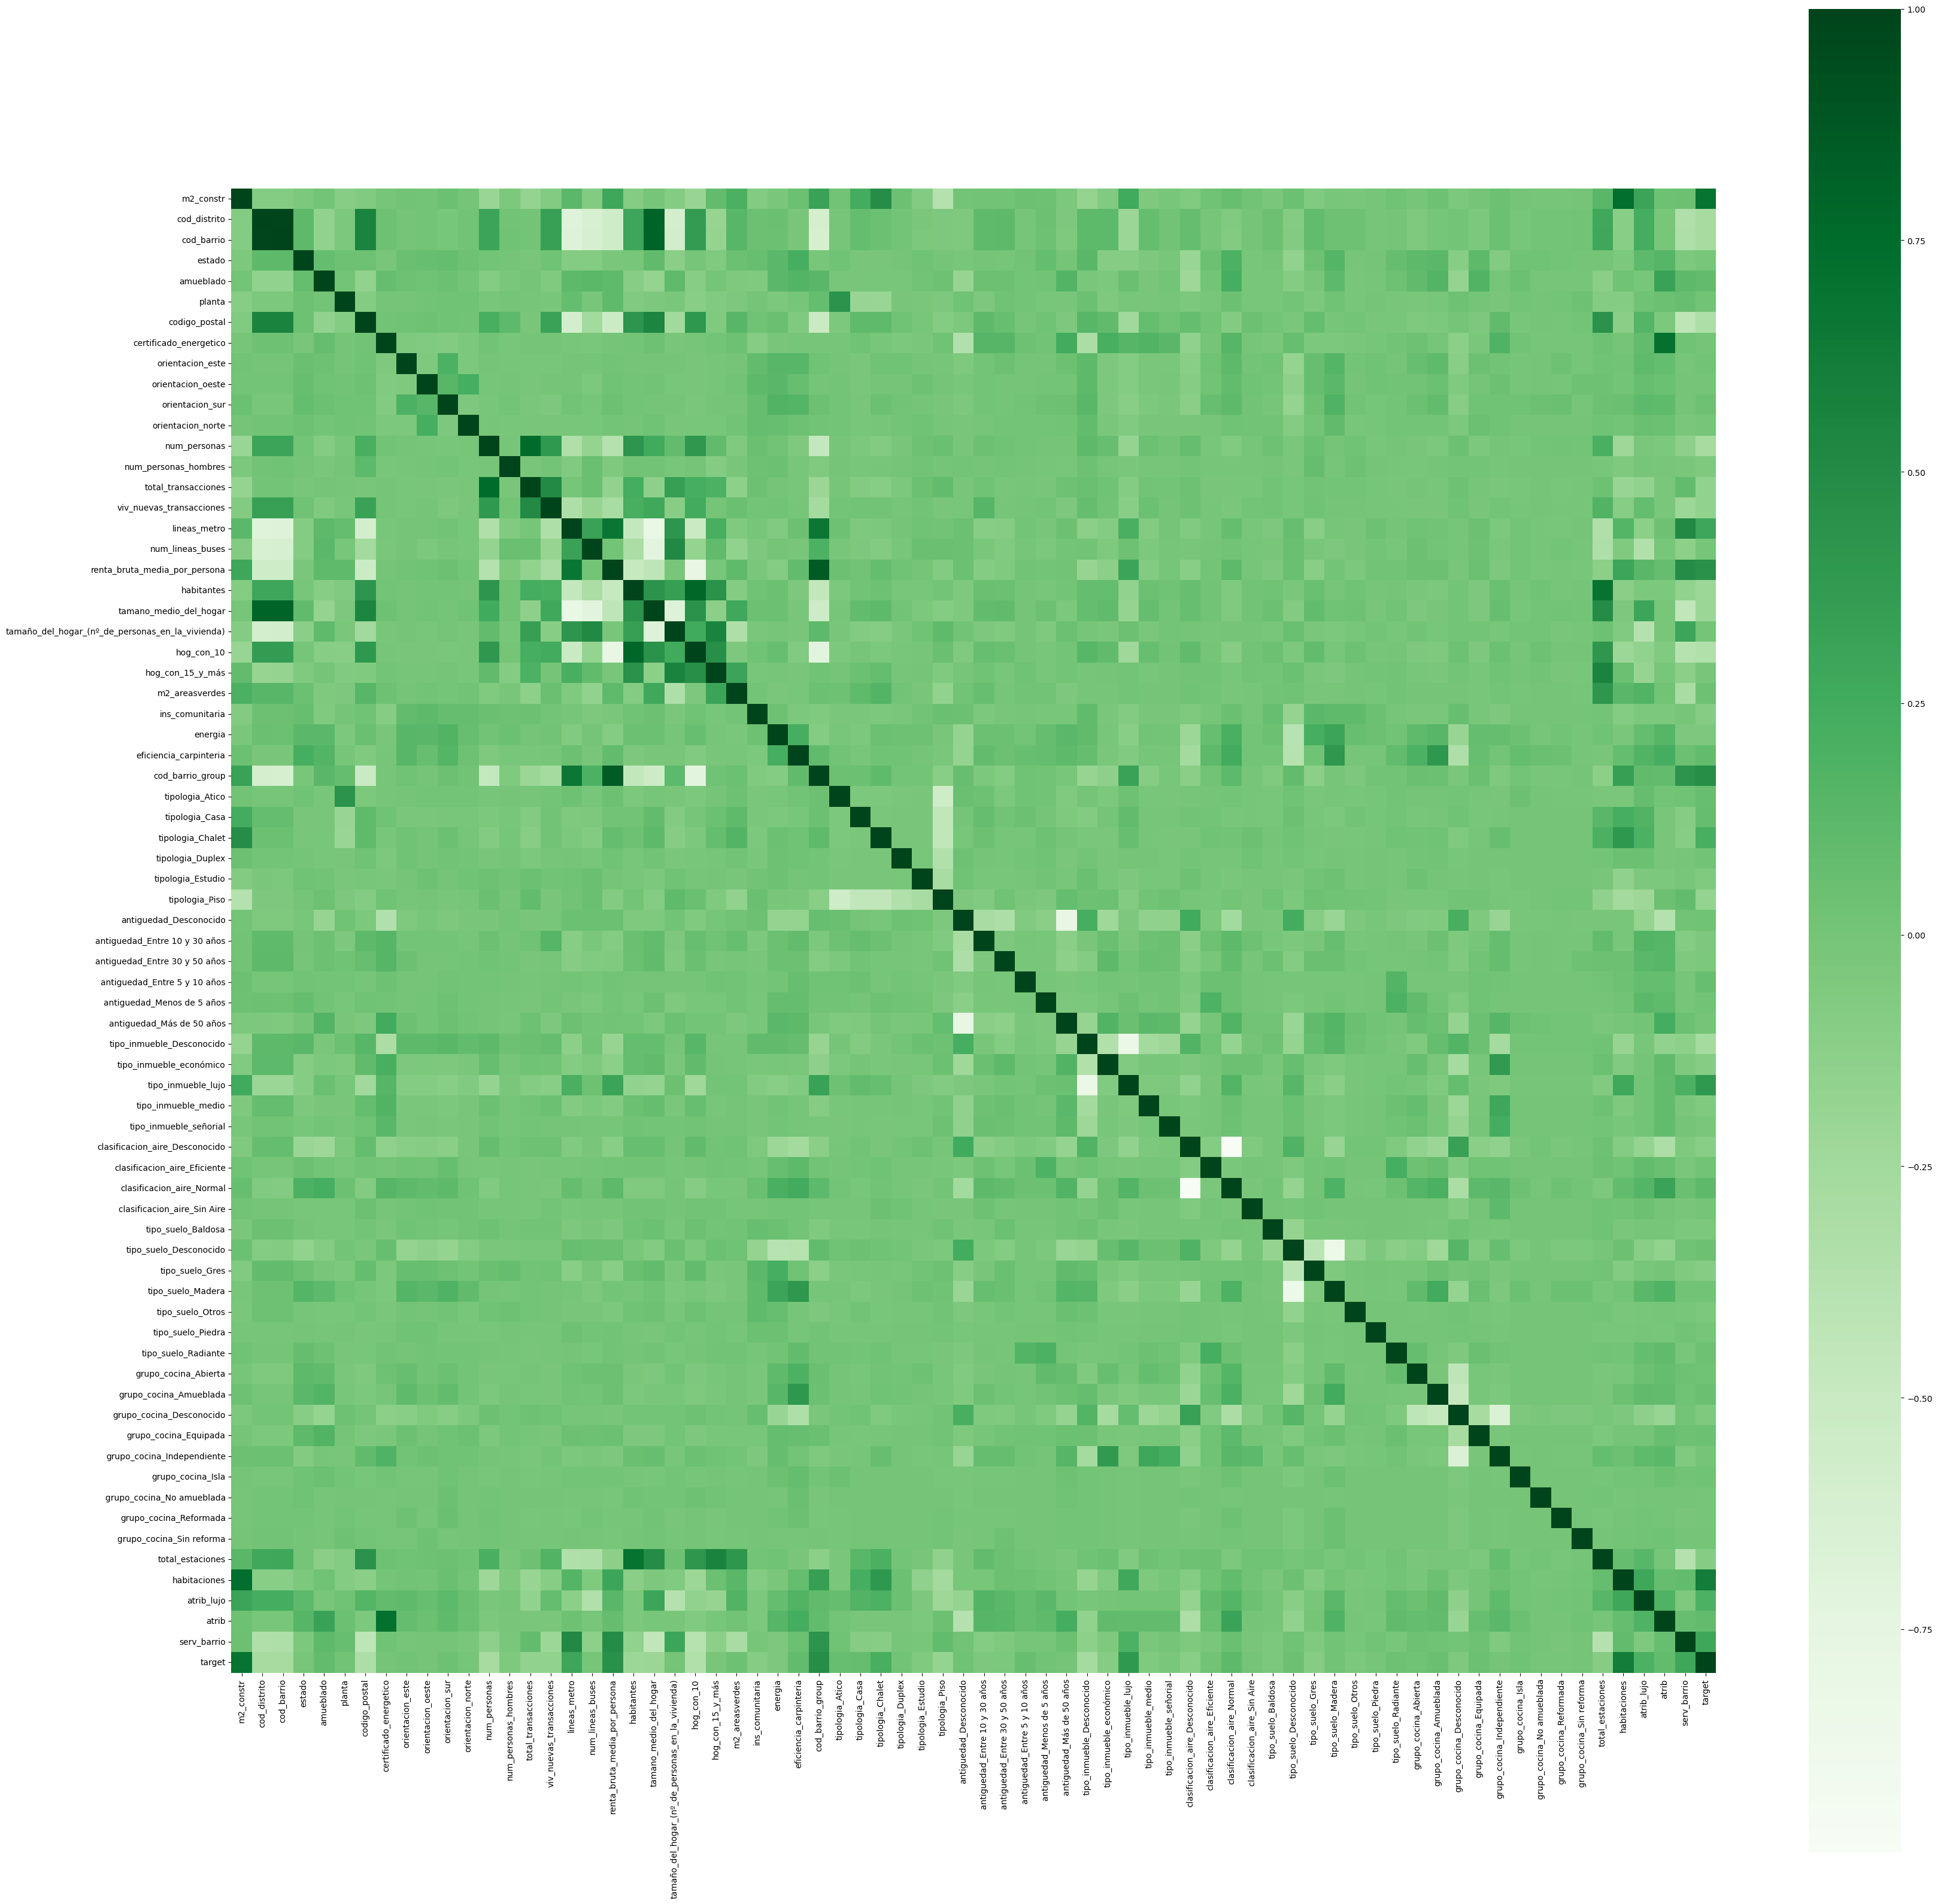

In [50]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(40,40))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=False, annot_kws={'size':15}, cmap='Greens')

### 2.3 Extracción de la variable target en train / test

In [51]:
X_train['target'].head()

0   -0.31
1    0.34
2    0.57
3    2.25
4   -0.19
Name: target, dtype: float64

In [53]:
df_ids = X_train[['url']]
y_train=X_train['target']
y_test=X_test['target']
X_train = X_train.drop(columns=["url","target"])
X_test = X_test.drop(columns=["url","target"])


In [55]:
# Ajustar las configuraciones de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar el ajuste a nuevas líneas

In [54]:

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Definir modelos y parámetros para la búsqueda de hiperparámetros
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "params": {"alpha": [0.1, 1, 10, 100]}
    },
    "Lasso Regression": {
        "model": Lasso(),
        "params": {"alpha": [0.001, 0.01, 0.1, 1, 10]}
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    },
    "XGBoost": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=42),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
    }
}


# Evaluar modelos y encontrar mejores hiperparámetros con validación cruzada
results = []
for name, config in models.items():
    print(f"Entrenando {name}...")
    grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_absolute_error")
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2, "Best Params": grid_search.best_params_})

# Mostrar resultados
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))





Entrenando Linear Regression...
Entrenando Ridge Regression...
Entrenando Lasso Regression...
Entrenando Random Forest...
Entrenando Gradient Boosting...
Entrenando XGBoost...
               Model  MAE  RMSE   R2  \
3      Random Forest 0.23  0.68 0.78   
5            XGBoost 0.24  0.69 0.77   
4  Gradient Boosting 0.26  0.75 0.72   
1   Ridge Regression 0.41  0.97 0.54   
2   Lasso Regression 0.40  0.97 0.54   
0  Linear Regression 0.42  0.98 0.54   

                                   Best Params  
3     {'max_depth': None, 'n_estimators': 200}  
5  {'learning_rate': 0.1, 'n_estimators': 200}  
4  {'learning_rate': 0.2, 'n_estimators': 200}  
1                               {'alpha': 100}  
2                              {'alpha': 0.01}  
0                                           {}  


In [56]:
print(results_df.sort_values(by="R2", ascending=False))

               Model  MAE  RMSE   R2                                  Best Params
3      Random Forest 0.23  0.68 0.78     {'max_depth': None, 'n_estimators': 200}
5            XGBoost 0.24  0.69 0.77  {'learning_rate': 0.1, 'n_estimators': 200}
4  Gradient Boosting 0.26  0.75 0.72  {'learning_rate': 0.2, 'n_estimators': 200}
1   Ridge Regression 0.41  0.97 0.54                               {'alpha': 100}
2   Lasso Regression 0.40  0.97 0.54                              {'alpha': 0.01}
0  Linear Regression 0.42  0.98 0.54                                           {}


In [ ]:

# Definir modelos y parámetros para la búsqueda de hiperparámetros
models = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 6, 9],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 6, 9],
            "subsample": [0.6, 0.8, 1.0]
        }
    }
}

# Evaluar modelos y encontrar mejores hiperparámetros con validación cruzada
results = []
for name, config in models.items():
    print(f"Entrenando {name}...")
    grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_absolute_error")
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2, "Best Params": grid_search.best_params_})

# Mostrar resultados
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))


Entrenando Random Forest...


Aplicamos ocho modelos de aprendizaje automático para la tarea de regresión.
Los modelos incluidos son: Regresión Lineal, Árbol de Decisión, Bosque Aleatorio, Regresor KNN, Gradient Boosting, XGBoost, AdaBoost y LightGBM Regressor. 
Cada modelo se entrena y evalua utilizando técnicas de validación cruzada para garantizar una evaluación sólida de su rendimiento.
Se consideran diversas métricas para evaluar la calidad de las predicciones de cada modelo, incluyendo el coeficiente de determinación (R²), el error cuadrático medio (RMSE), entre otros.


In [ ]:


# Definir modelos y parámetros para la búsqueda de hiperparámetros
models = {
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.1, 0.2, 0.3],
            "max_depth": [3, 6, 9, 12],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300, 500],
            "learning_rate": [0.01, 0.1, 0.2, 0.3],
            "max_depth": [3, 6, 9, 12],
            "subsample": [0.6, 0.8, 1.0]
        }
    }
}

# Evaluar modelos y encontrar mejores hiperparámetros con RandomizedSearchCV
best_estimators= []
for reg_name, config in models.items():
    print(f"Entrenando {name}...")
    random_search = RandomizedSearchCV(config["model"], config["params"], n_iter=20, cv=5, 
                                       scoring="neg_mean_absolute_error", random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)

     # Resultados del Random Search
    df_output = pd.DataFrame(random_search.cv_results_)
    df_output['regressor'] = reg_name
    random_search.append(df_output)
    


    # Modelo re-entrenado con los hiperparámetros óptimos
    best_estimators[reg_name] = random_search.best_estimator_

    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": reg_name, "MAE": mae, "RMSE": rmse, "R2": r2, "Best Params": random_search.best_params_})

# Mostrar resultados
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))


In [ ]:
random_search_output = list()
best_estimators = {}

for reg_name, reg_info in regressors.items():
    print(reg_name)

    reg_random_search = RandomizedSearchCV(
        estimator=reg_info['model'],
        param_distributions=reg_info['hyperparameters'],
        n_iter=20,
        cv=5,
        scoring="neg_mean_squared_error",  # Métrico adecuado para regresión
        return_train_score=True,
        refit=True,
        n_jobs=-1,
        verbose=1,
        error_score='raise'
    )
    reg_random_search.fit(X_train, y_train)

    # Resultados del Random Search
    df_output = pd.DataFrame(reg_random_search.cv_results_)
    df_output['regressor'] = reg_name
    random_search_output.append(df_output)

    # Modelo re-entrenado con los hiperparámetros óptimos
    best_estimators[reg_name] = reg_random_search.best_estimator_


Los resultados indican que el modelo con mejor desempeño es xxxxxxx, logrando un R² de xxxxx%.
A continuación, el xxxxxxx obtuvo un R² del xxxxx%.
Estos resultados reflejan la capacidad de estos modelos para capturar y predecir patrones en los datos de manera efectiva.

8. Features importantes

Analizamos las variables o atributos que tienen un impacto significativo en la predicción o explicación de un resultado específico en un modelo estadístico o de aprendizaje automático. Estas características se seleccionan en función de su capacidad para influir en la variable objetivo y aportar información útil al modelo. 

Existen varias técnicas para determinar qué características son más importantes en un modelo, entre ellas:

1. **Análisis de correlación**: Evalúa la relación entre cada característica y la variable objetivo.

2. **Importancia de variables en modelos basados en árboles**: Modelos como Random Forest, Gradient Boosting y XGBoost proporcionan métricas que indican la importancia relativa de cada característica para la predicción.

3. **Selección de características basada en modelos**: Utiliza algoritmos como la selección progresiva, la eliminación regresiva o LASSO para identificar un subconjunto óptimo de características.

4. **Análisis de Componentes Principales (PCA)**: Transforma las características en un nuevo conjunto de variables no correlacionadas, donde los primeros componentes retienen la mayor parte de la variabilidad de los datos.

5. **Conocimiento del dominio**: El conocimiento especializado sobre el problema puede ser clave para identificar las características importantes.



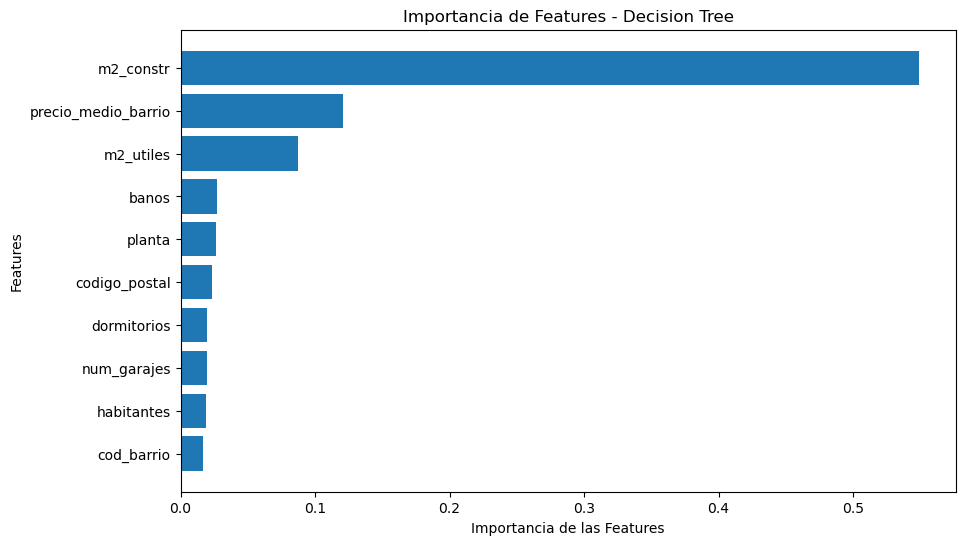

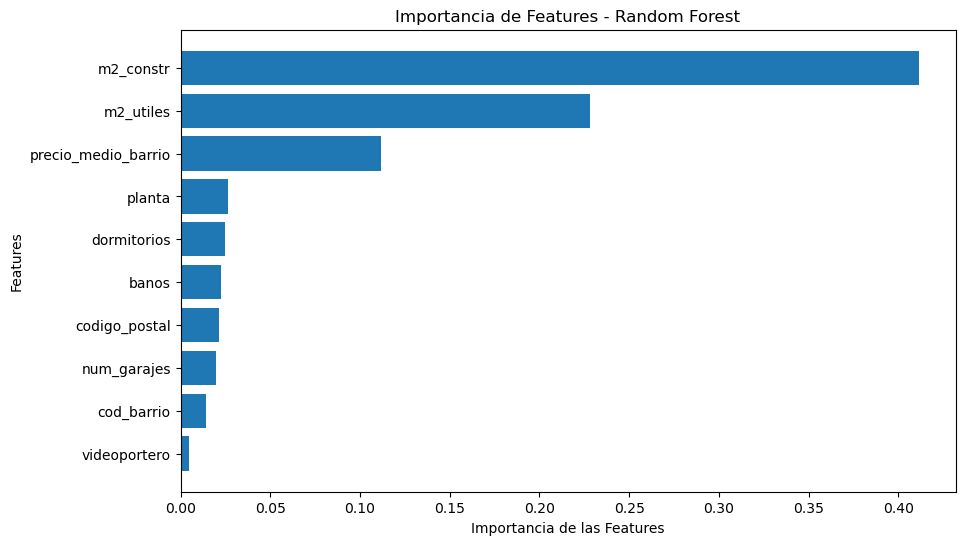

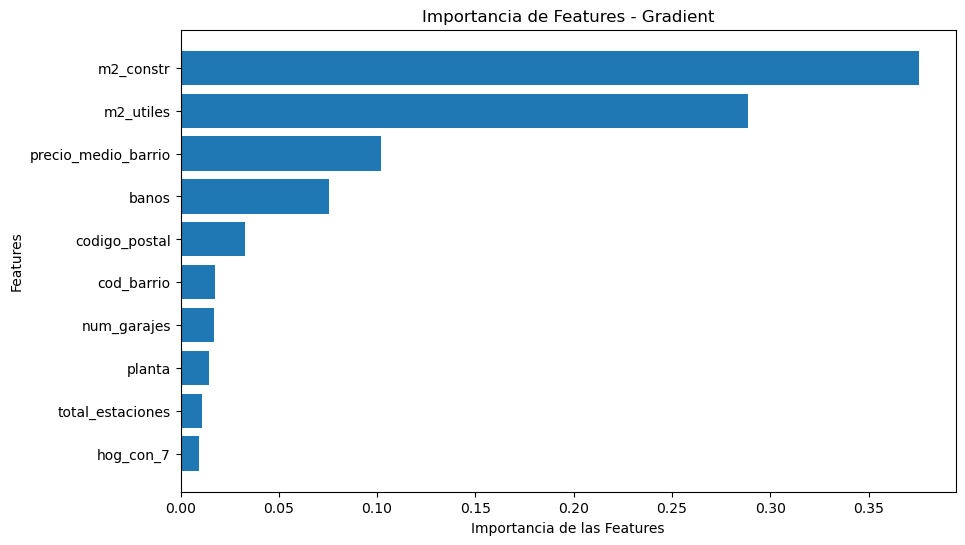

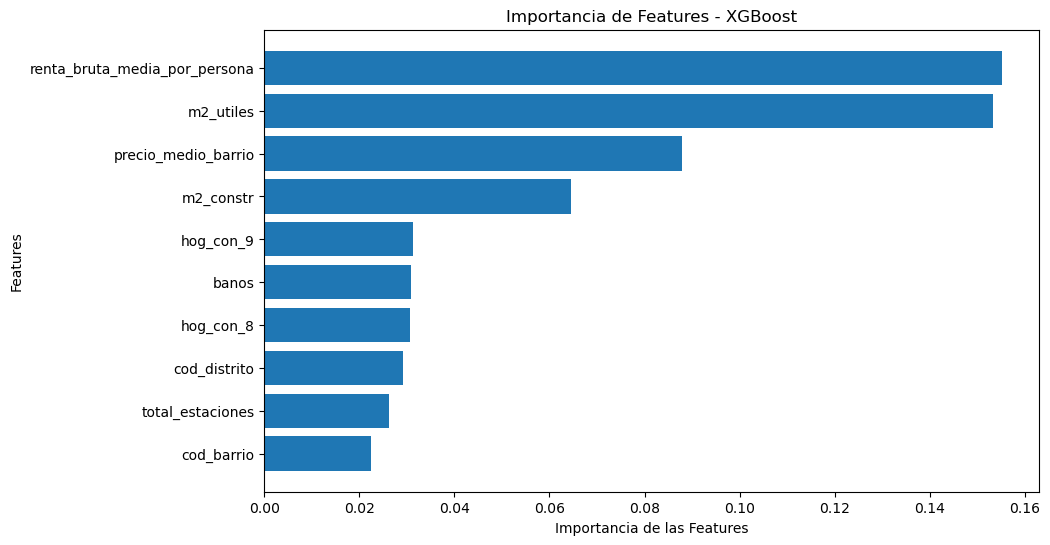

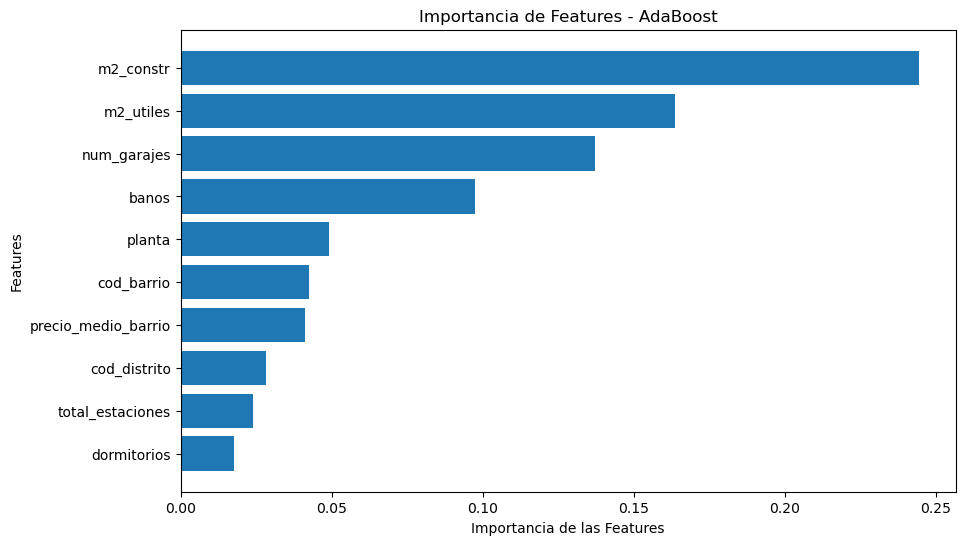

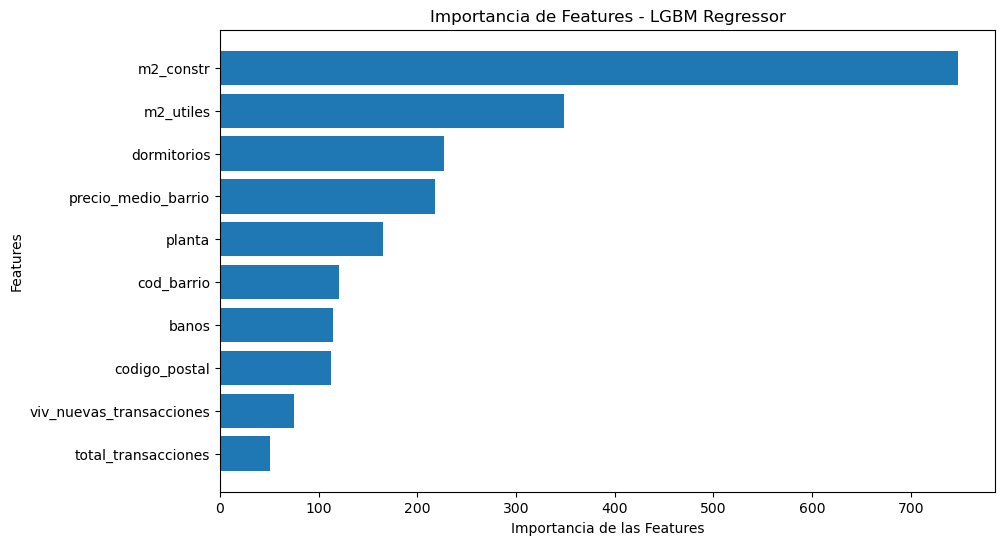

In [132]:
# Template list
models = {
 "Linear Regression": LinearRegression(),
 "Decision Tree": DecisionTreeRegressor(),
 "Random Forest": RandomForestRegressor(),
 "KNN Regressor": KNeighborsRegressor(),
 "Gradient": GradientBoostingRegressor(),
 "XGBoost": XGBRegressor(),
 "AdaBoost": AdaBoostRegressor(),
 "LGBM Regressor": lgb.LGBMRegressor()
}


# Loop para crear y entrenar modelos
for nome, modelo in models.items():
    
    # Entrenar el modelo
    modelo.fit(X_train_imputed, y_train)

    # Comprobar si el modelo tiene el atributo o método 'feature_importances_'
    if hasattr(modelo, 'feature_importances_'):
        
        # Obtener la importancia de las características
        importancias = modelo.feature_importances_

        # Obtener los nombres de las características
        nomes_features = X_train.columns  

        # Ordenar las características y sus importancias
        indices = np.argsort(importancias)
        importancias = importancias[indices]
        nomes_features = nomes_features[indices]

        # Seleccionar las 6 características más importantes
        importancias_top10 = importancias[-10:]
        nomes_features_top10 = nomes_features[-10:]

        # Graficar las 6 características más importantes
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(nomes_features_top10)), importancias_top10, align='center')
        plt.yticks(range(len(nomes_features_top10)), nomes_features_top10)
        plt.xlabel('Importancia de las Features')
        plt.ylabel('Features')
        plt.title(f'Importancia de Features - {nome}')
        plt.grid(False)
        plt.show()
